## Fetal Health Classifier




This project tackles the fetal health classification problem using random forest, XGBoost and various ensemble learning methods, for better performances. 

This notebook mainly focuses on:
- preprocess and oversample imbalanced datasets.
- use random forest, Adaboost, and XGBoost.
- use grid search (recap on DAMI) and randomized search.
- use the scikit-learn pipeline to construct a complete and reusable preprocessing cycle.
- eventually integrate grid search and pipeline to create an automated evaluation process to find out the best ensemble model for dataset

Dataset:

This project uses the [fetal health classification](https://www.kaggle.com/andrewmvd/fetal-health-classification) data from Kaggle. The reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a crucial indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under five years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to the notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost-accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions, and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetricians into three classes:

- Normal: 1
- Suspect: 2
- Pathological: 3

### 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import imblearn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("fetal_health.csv")

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# Check for duplicates in data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [5]:
# How many duplicates
data.duplicated().sum()

np.int64(13)

In [6]:
# drop_duplicates
data_dropped = data.drop_duplicates()

In [7]:
# Check dropped datapoints and compare to before dropping duplicates
data_dropped

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [8]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [9]:
X = data_dropped.iloc[:, :-1]
y = data_dropped["fetal_health"].astype(int) 

In [10]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [11]:
y.head()

0    2
1    1
2    1
3    1
4    1
Name: fetal_health, dtype: int64

In [12]:
X.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,70.535258,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,39.007706,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


In [13]:
import seaborn as sns

<Axes: xlabel='fetal_health', ylabel='count'>

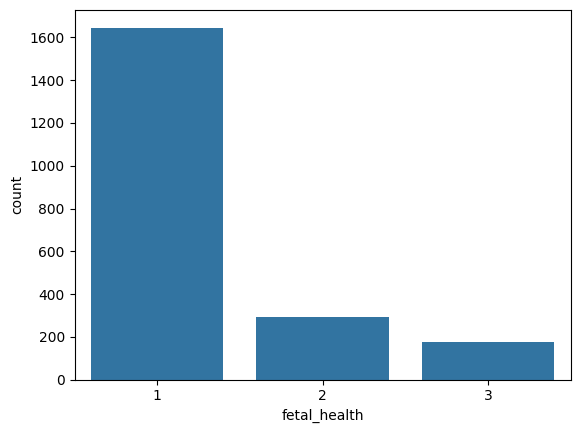

In [14]:
# countplot - check the proportion visually
sns.countplot(x=y)

In [15]:
# series.value counts - check the proportion
y.value_counts()

fetal_health
1    1646
2     292
3     175
Name: count, dtype: int64

In [16]:
# proportion
y.value_counts() / len(y)

fetal_health
1    0.778987
2    0.138192
3    0.082821
Name: count, dtype: float64

In [17]:
# Missing data check
X.isna()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
X.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [19]:
X.duplicated().sum()

np.int64(2)

In [20]:
X_dropped = X[~X.duplicated()]
y_dropped = y[~X.duplicated()]

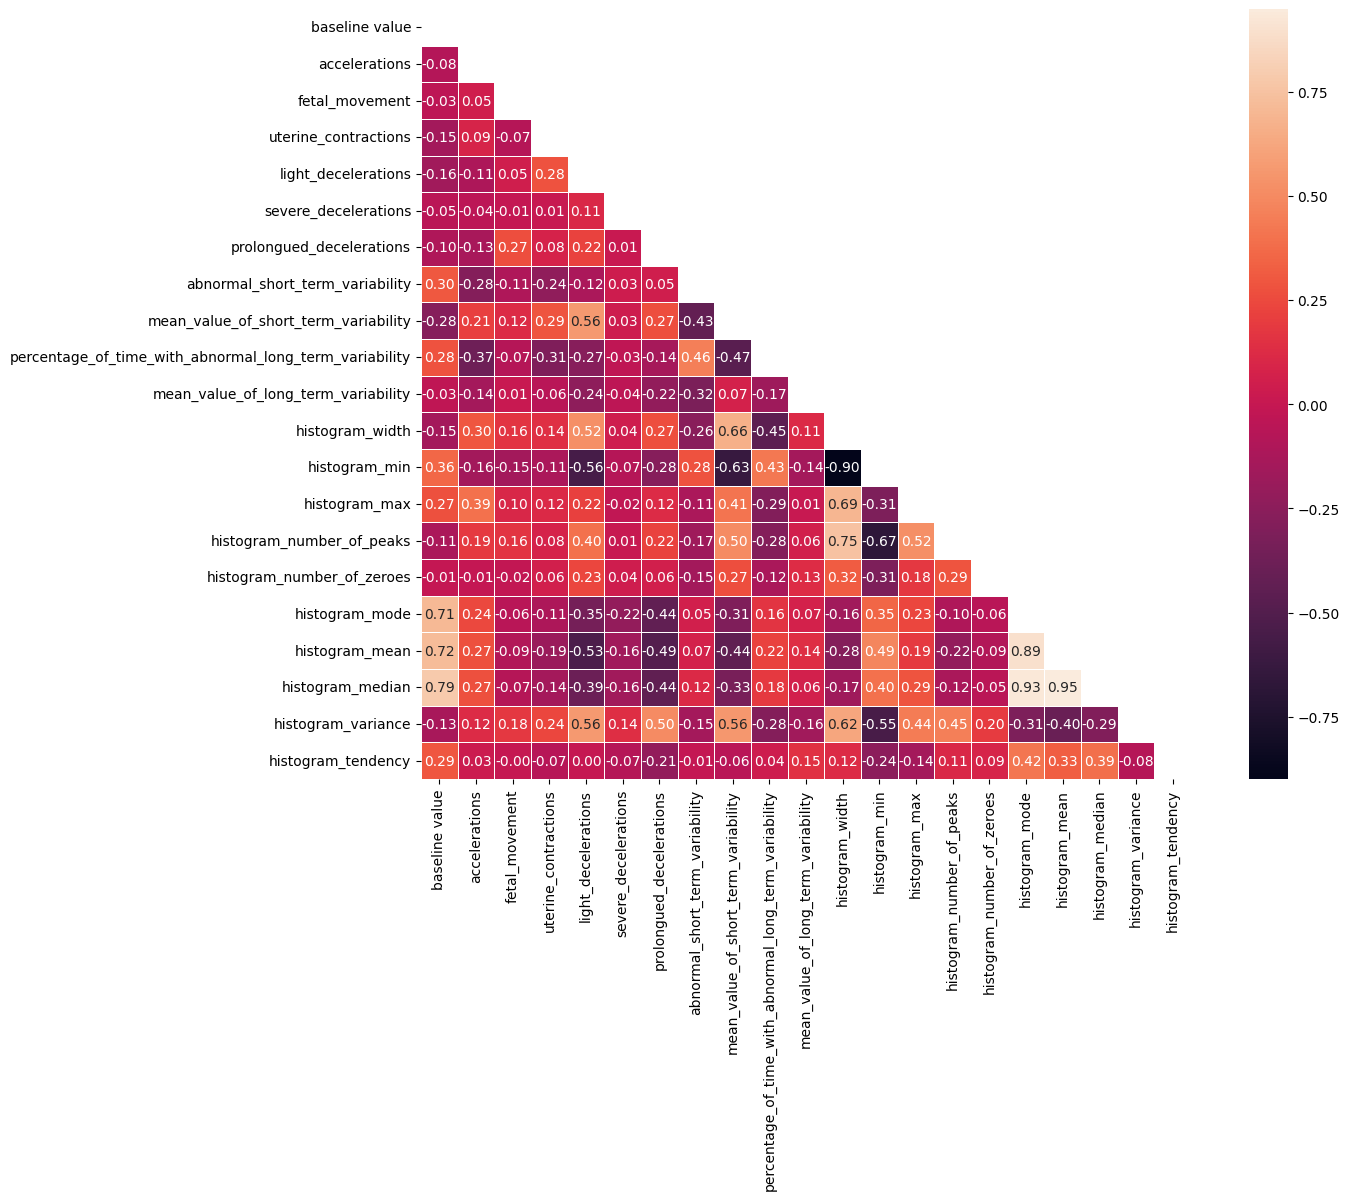

In [21]:
# Correlation check - among the features
mat = X_dropped.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True)

(0.0, 22.0)

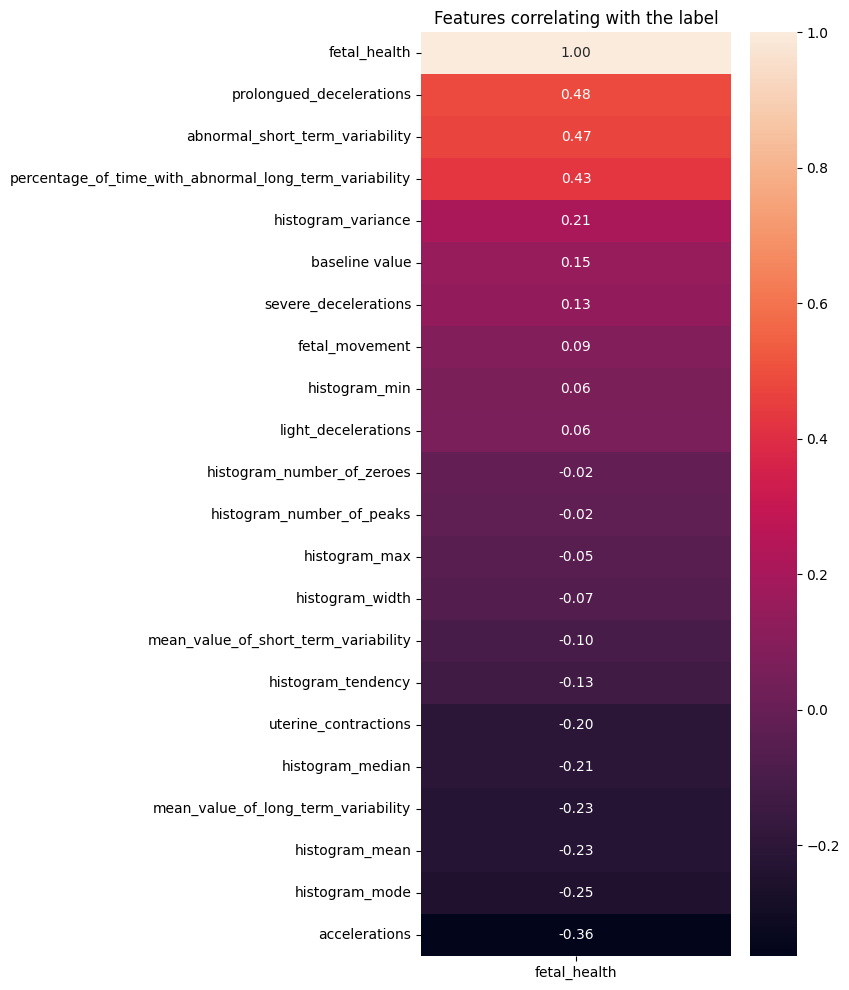

In [22]:
# Correlation check - features and the label
plt.figure(figsize=(5, 12))
heatmap = sns.heatmap(data.corr()[['fetal_health']].sort_values(by='fetal_health', ascending=True), fmt="0.2f", annot=True)
heatmap.set_title('Features correlating with the label')
heatmap.set_ylim([0,22])

### 2. Preprocessing

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.3, stratify=y_dropped)

**Use Scikit-learn to Standardization**

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X=X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = scaler.transform(X=X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [26]:
# standardized mean and standard deviation
X_train_scaled.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,1.477000e+03,1.477000e+03,1477.000000,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,...,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03
mean,-8.394699e-16,-1.178625e-16,0.000000,2.164822e-17,7.516744e-17,2.405358e-17,-7.697145e-17,3.968841e-17,2.766162e-17,-7.216074e-18,...,1.274840e-16,-9.140360e-17,1.082411e-16,-6.855270e-17,-3.367501e-17,1.876179e-16,-6.873310e-16,2.573733e-16,3.247233e-17,1.142545e-17
std,1.000339e+00,1.000339e+00,1.000339,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,...,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00
min,-2.770354e+00,-8.188319e-01,-0.204158,-1.511255e+00,-6.474928e-01,-5.211091e-02,-2.678720e-01,-2.033099e+00,-1.289352e+00,-5.274566e-01,...,-1.752209e+00,-1.460593e+00,-2.352146e+00,-1.399577e+00,-4.702112e-01,-4.690539e+00,-3.968895e+00,-4.244724e+00,-6.418999e-01,-2.165684e+00
25%,-7.325986e-01,-8.188319e-01,-0.204158,-8.332102e-01,-6.474928e-01,-5.211091e-02,-2.678720e-01,-8.722039e-01,-7.240213e-01,-5.274566e-01,...,-8.505251e-01,-9.174671e-01,-6.737193e-01,-7.190254e-01,-4.702112e-01,-4.968791e-01,-6.087718e-01,-6.198334e-01,-5.734633e-01,-5.278369e-01
50%,-1.938420e-02,-3.063680e-01,-0.204158,1.838571e-01,-6.474928e-01,-5.211091e-02,-2.678720e-01,1.145568e-01,-1.586906e-01,-5.274566e-01,...,-7.765346e-02,-9.422884e-04,-1.142436e-01,-3.847397e-02,-4.702112e-01,1.108977e-01,1.020234e-01,7.726090e-02,-3.681536e-01,-5.278369e-01
75%,6.938302e-01,7.185597e-01,-0.141997,8.619020e-01,3.435402e-01,-5.211091e-02,-2.678720e-01,8.691385e-01,4.066400e-01,2.885117e-02,...,7.467430e-01,8.816372e-01,5.571271e-01,6.420775e-01,-4.702112e-01,6.578967e-01,6.835831e-01,7.046458e-01,1.793390e-01,1.110010e+00
max,2.629698e+00,3.793343e+00,9.762269,3.574082e+00,4.307672e+00,1.918984e+01,8.222406e+00,2.320257e+00,6.286079e+00,4.534944e+00,...,2.807734e+00,2.239452e+00,4.137771e+00,4.725386e+00,1.135110e+01,3.028226e+00,3.074440e+00,3.353604e+00,8.562820e+00,1.110010e+00


In [27]:
y_train.value_counts()

fetal_health
1    1151
2     204
3     122
Name: count, dtype: int64

**Use imblearn to Oversampling for the minority classes(2 and 3)**

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
# Define RandomOverSampler to a variable ros
# ratio
ros = RandomOverSampler(random_state=12345) 
# Create X_resampled, y_resampled using the fit_resample method or fit + sample.
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

In [30]:
# value_counts
y_train_resampled.value_counts()

fetal_health
1    1151
3    1151
2    1151
Name: count, dtype: int64

Unfortunately, this simple oversampler just duplicates the instances we already have. So I put more weights on the minority classes.

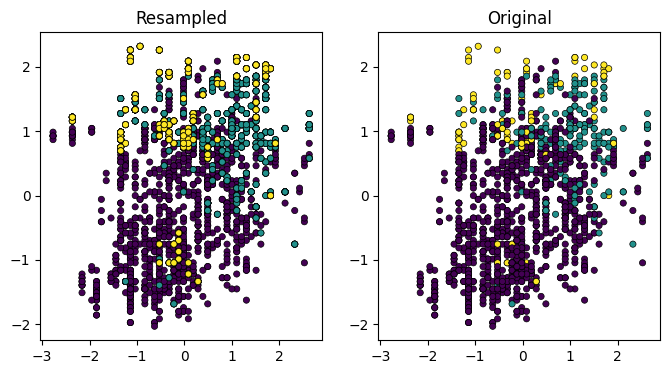

In [31]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].scatter(X_train_resampled.iloc[:, 0], X_train_resampled.iloc[:, 7], c=y_train_resampled, s=20, linewidth=0.5, edgecolor='black')
ax[1].scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 7], c=y_train, s=20, linewidth=0.5, edgecolor='black')
ax[0].set_title("Resampled")
ax[1].set_title("Original")
plt.show()

**Use SMOTE or ADASYN to Resample**

In [32]:
from imblearn.over_sampling import SMOTE, ADASYN

In [33]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train_scaled, y_train)

X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train_scaled, y_train)

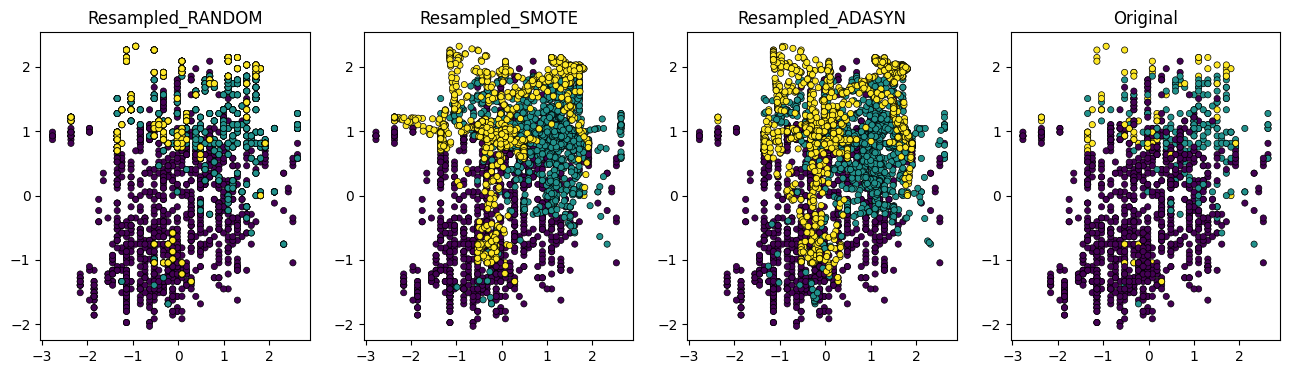

In [34]:
fig, ax = plt.subplots(1, 4, figsize=[16, 4])
ax[0].scatter(X_train_resampled.iloc[:, 0], X_train_resampled.iloc[:, 7], c=y_train_resampled, s=20, linewidth=0.5, edgecolor='black')
ax[1].scatter(X_resampled_SMOTE.iloc[:, 0], X_resampled_SMOTE.iloc[:, 7], c=y_resampled_SMOTE, s=20, linewidth=0.5, edgecolor='black')
ax[2].scatter(X_resampled_ADASYN.iloc[:, 0], X_resampled_ADASYN.iloc[:, 7], c=y_resampled_ADASYN, s=20, linewidth=0.5, edgecolor='black')
ax[3].scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 7], c=y_train, s=20, linewidth=0.5, edgecolor='black')
ax[0].set_title("Resampled_RANDOM")
ax[1].set_title("Resampled_SMOTE")
ax[2].set_title("Resampled_ADASYN")
ax[3].set_title("Original")

plt.show()

We keep the minority classes (2 and 3) at most 50% of the majority(class 1).

### 3. Simple Ensemble


**Use VotingClassifier to do a simple ensemble model with a hard/soft voting**

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [36]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
svm = SVC()

In [37]:
voting = VotingClassifier([('lr', lr), ('dt', dt), ('svm', svm)], voting='hard')
voting

,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [38]:
# fit the method on X_train_scaled and y_train
voting.fit(X_train_scaled, y_train)

,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


Check the scores of each method and the voting classifier.

In [39]:
for clf in (dt, lr, svm, voting):
  clf.fit(X_resampled_SMOTE, y_resampled_SMOTE)
  print(clf.__class__.__name__, clf.score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9069400630914827
LogisticRegression 0.8675078864353313
SVC 0.8769716088328076
VotingClassifier 0.88801261829653


In [40]:
for clf in (dt, lr, svm, voting):
  clf.fit(X_resampled_ADASYN, y_resampled_ADASYN)
  print(clf.__class__.__name__, clf.score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9006309148264984
LogisticRegression 0.8470031545741324
SVC 0.8690851735015773
VotingClassifier 0.8738170347003155


In [41]:
for clf in (dt, lr, svm, voting):
  clf.fit(X_train_scaled, y_train)
  print(clf.__class__.__name__, clf.score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9305993690851735
LogisticRegression 0.8943217665615142
SVC 0.9211356466876972
VotingClassifier 0.9227129337539433


In [42]:
from sklearn.metrics import classification_report

performance scores:

In [43]:
y_pred = voting.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       494
           2       0.77      0.68      0.72        87
           3       0.98      0.83      0.90        53

    accuracy                           0.92       634
   macro avg       0.90      0.83      0.86       634
weighted avg       0.92      0.92      0.92       634



### 4. Try More Ensemble Methods

#### Bagging

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
# max_features, bootstrap_features
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train_scaled, y_train)
bag_clf.score(X_test_scaled, y_test)

0.9384858044164038

Out-of-bag evaluation: Average the scores using the out of bag samples.

In [46]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, bootstrap = True, n_jobs = -1, oob_score=True)
bag_clf.fit(X_train_scaled, y_train)
bag_clf.score(X_test_scaled, y_test)

0.9384858044164038

In [47]:
bag_clf.oob_score_

0.9350033852403521

In [48]:
bag_clf.oob_decision_function_

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(1477, 3))

#### Random forests = Decision tree trained via bagging

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.943217665615142

#### AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ab = AdaBoostClassifier()
ab.fit(X_train_scaled, y_train)
print(ab.score(X_test_scaled, y_test))

0.8911671924290221


In [53]:
ab = AdaBoostClassifier(estimator=LogisticRegression())
ab.fit(X_train_scaled, y_train)
print(ab.score(X_test_scaled, y_test))

0.8738170347003155


#### XGBoost

In [54]:
import xgboost as xgb

In [55]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Then train the model
xgbm = xgb.XGBClassifier()
xgbm.fit(X_train_scaled, y_train_encoded)
print(xgbm.score(X_test_scaled, y_test_encoded))

0.9558359621451105


### 5. Grid search and Randomized search

#### Grid Search

In [56]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [57]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#### Randomized Search

In [58]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [64]:
%%time
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [65]:
# best_estimator
rf_random.best_estimator_

,n_estimators,400
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [66]:
# best_score
rf_random.best_score_

np.float64(0.9397527443834276)

In [67]:
# test score
rf_random.score(X_test_scaled, y_test)

0.9526813880126183

In [68]:
gs_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1)

In [69]:
%%time
gs_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; t

KeyboardInterrupt: 

### 6. Pipelines

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures

In [71]:
pipe = Pipeline([
  ('featureGenerator', PolynomialFeatures()),
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold(0.1)),
  ('classifier', RandomForestClassifier())
])

In [72]:
pipe.fit(X_train_scaled, y_train)

,steps,"[('featureGenerator', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [73]:
print('Training set score: ' + str(pipe.score(X_train_scaled, y_train)))
print('Test set score: ' + str(pipe.score(X_test_scaled, y_test)))

Training set score: 1.0
Test set score: 0.944794952681388


#### Add private functions to pipelines

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [75]:
class SquaredFeatureTransformer(BaseEstimator, TransformerMixin):
  #This class will transform the dataset by adding squared features
  #You need to change the transform function to square each feature's values and add them to the matrix.

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_squared = X ** 2
        return np.hstack((X, X_squared))

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('squared', SquaredFeatureTransformer()),
    ('selector', VarianceThreshold(threshold=0.1)),
    ('classifier', RandomForestClassifier())
])

#### Integrate gird search into pipelines

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
parameters = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier': [AdaBoostClassifier(), RandomForestClassifier()],
    'selector__threshold': [0, 0.001, 0.01]
}

# Run grid search
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=parameters,
    cv=5
)

#### Nested k-fold cross Validation

In [77]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

data = load_breast_cancer()
X, y = data.data, data.target

# Define the parameter grid
parameters = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1]
    }
}

# Run grid search (in nested CV)
final_accuracy = {}
outer_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for model_name in parameters:
    scores = []

    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('selector', VarianceThreshold()),
            ('classifier',
             RandomForestClassifier(random_state=42) if model_name == 'RandomForest'
             else AdaBoostClassifier(random_state=42))
        ])

        inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator=pipeline,
                                   param_grid=parameters[model_name],
                                   cv=inner_cv)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        acc = np.mean(y_pred == y_test)
        scores.append(acc)

    final_accuracy[model_name] = np.mean(scores)

In [82]:
final_accuracy

{'RandomForest': np.float64(0.9543056585124783),
 'AdaBoost': np.float64(0.9455399061032863)}

### 7. Test and Visualized Result

In [ ]:
import ipytest, pytest
ipytest.autoconfig()

In [96]:
import pytest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

@pytest.fixture
def sample_data():
    # Create a small synthetic dataset similar to fetal_health.csv
    np.random.seed(42)
    X = pd.DataFrame(np.random.randn(100, 5), columns=[f'feature_{i}' for i in range(5)])
    y = pd.Series(np.random.choice([1, 2, 3], size=100), name='fetal_health')
    return X, y

def test_pipeline_fit_predict(sample_data):
    X, y = sample_data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', VarianceThreshold(0.1)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    assert len(y_pred) == len(y_test)
    # Check that predictions are in the expected set
    assert set(np.unique(y_pred)).issubset({1, 2, 3})

def test_classification_report_and_confusion_matrix(sample_data):
    X, y = sample_data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', VarianceThreshold(0.1)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    assert '1' in report and '2' in report and '3' in report
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.close()  

def test_export_predictions_to_csv(tmp_path, sample_data):
    X, y = sample_data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', VarianceThreshold(0.1)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    result_df = X_test.copy()
    result_df['true_label'] = y_test.values
    result_df['predicted_label'] = y_pred
    out_csv = tmp_path / "classification_results.csv"
    result_df.to_csv(out_csv, index=False)
    # Check file exists and has correct columns
    loaded = pd.read_csv(out_csv)
    assert 'true_label' in loaded.columns
    assert 'predicted_label' in loaded.columns
    assert len(loaded) == len(y_test)

In [97]:
ipytest.run('-q') 

...                                                                                          [100%]


<ExitCode.OK: 0>

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       106
           1       0.96      0.97      0.97       178

    accuracy                           0.96       284
   macro avg       0.96      0.95      0.95       284
weighted avg       0.96      0.96      0.96       284



In [106]:
import pandas as pd

# make result table
results = pd.DataFrame({
    "true_label": y_test,
    "predicted_label": y_pred
})

# mark whether prediction was correct
results["correct"] = results["true_label"] == results["predicted_label"]

In [108]:
results.to_csv("classification_test_results.csv", index=False)

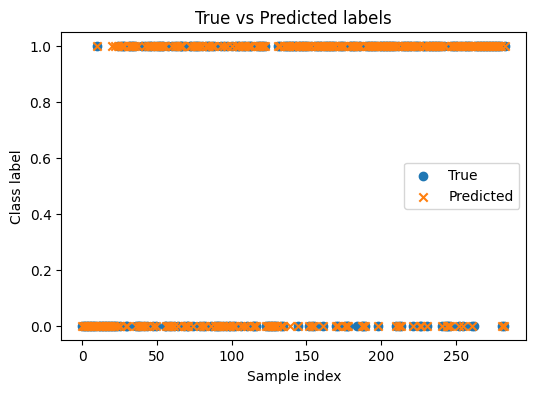

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="True", marker='o')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", marker='x')
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Class label")
plt.title("True vs Predicted labels")
plt.show()